# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

One of the most recognized characteristics of the city of Buenos Aires, in Argentina, is its cuisine. The cosmopolitan capital of Argentina draws from Italian, German, British, Spanish, Arabic, and native cultures. Its beef is nonpareil, yet Buenos Aires also has superb fruit and vegetables, outstanding wine, wonderful dairy products, and sweets prepared in ways that borrow from the city’s diverse cultural heritage. Less noted is the fact that Argentina has a long coastline teeming with fish, which is increasingly taking its place next to beef and lamb. Few cities benefit so completely from homegrown foods, making Buenos Aires both self-sufficient and also supremely well-fed. 
This situation turns commercial activities related to food as one of the main practices for new shops. 

On the other hand, Buenos Aires, and Argentina in general, has been suffered the impact of economic and financial problems which generates issues related to pricing volatility, urban land offer shortages, and infrastructure problems, among others.

For all this, the risk for a new business implementation can be high, and some questions about the reliability of it appear:
Is there a good offer of urban land?
Where do I have to install my new restaurant?
Is the price fair?
Are there structural problems, like waterlogging, which can compromise my business? 
Will I have enough customers to make my business profitable?

In this project, I will try to find insights that allow a stakeholder to decide which is the best location for a restaurant in the city of Buenos Aires, Argentina.

In the analysis, I will include some factors that I consider important for decision-making, like the price of properties in Buenos Aires, waterlogging problems, and the distribution of venues, like other restaurants, coffee shops, and hotels, among others.

Using data science, I hope to get valuable information about the best candidate among the urban land offer in the city of Buenos Aires, Argentina, and its advantages for the stakeholders.

## Data <a name="data"></a>

According to the definition of the business problem, factors that will influence the results are:
* offer of properties in the city of Buenos Aires, Argentina
* structural problems like waterlogging
* number of existing venues in each zone

The data sources needed to extract information for the analysis are
* lists of neighborhoods of the city provided as a GEOJSON file, which includes the coordinates for graphical representation. The details of the dataset, according to the City of Buenos Aires Government are:


		
<h4 align = "center">
Neighborhoods of Buenos Aires - main fields	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in GEOJSON file</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>Barrio</td>
    <td>Neighborhood Name</td>
  </tr>
  <tr>
    <td>Comuna</td>
    <td>Commune Number</td>
  </tr>
  <tr>
    <td>Perimetro</td>
    <td>Neighborhood's Perimetert</td>
  </tr>
  <tr>
    <td>Area</td>
    <td>Total Area</td>
  </tr>
  <tr>
    <td>Geometry.type</td>
    <td>Type of geometry</td>
  </tr>
  <tr>
    <td>Geometry.coordinates</td>
    <td>Geospatial points for area definition</td>
  </tr>
  

</table>

</body>
</html>


* list of offered urban land in the city of Buenos Aires as a CSV file, which includes features like price, total area, and coordinates for a better location. The main details of the dataset, according to the City of Buenos Aires Government are:

<h4 align = "center">
Urban Land Offer in Buenos Aires for 2018 - main fields	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in Table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>long</td>
    <td>Longitude - Degrees</td>
  </tr>
  <tr>
    <td>lat</td>
    <td>Latitude - Degrees</td>
  </tr>
  <tr>
    <td>m2total</td>
    <td>Total Area of urban land</td>
  </tr>
  <tr>
    <td>preciousd</td>
    <td>Total price in USD</td>
  </tr>
</table>

</body>
</html>


* data from waterlogging zones as a CSV file, which includes coordinates for the location and grade of criticality. The main details of the dataset, according to the City of Buenos Aires Government are:

		
<h4 align = "center">
Waterlogging Zones in Buenos Aires, 2019
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in Table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>WKT (Well Known Text)</td>
    <td>Geometry type and coordinates</td>
  </tr>
  <tr>
    <td>Clasif</td>
    <td>criticality level of the zone</td>
  </tr>
</table>

</body>
</html>

* List of nearby venues to each urban land candidate in JSON format, which includes names, category, and location. 

The Government of the city of Buenos Aires provides the datasets related to urban land, waterlogging, and neighborhoods in the city. (https://data.buenosaires.gob.ar/)

The Foursquare API provides the list of venues for the analysis. (https://developer.foursquare.com/docs/places-api/)

### Neighborhoods in the city of Buenos Aires

First, I would like to take a quick view of the city of Buenos Aires and its neighborhoods. I'll use Nominatim module to find the coordinates of the city and folium library to plot the map.

In [3]:
!pip install geopy

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#get the coordinates of Buenos Aires
address = 'Buenos Aires'

geolocator = Nominatim(user_agent="ba_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the city of Buenos Aires {}, {}.'.format(latitude, longitude))

     |████████████████████████████████| 122kB 6.9MB/s eta 0:00:01
The geograpical coordinate of the city of Buenos Aires -34.6075682, -58.4370894.


Now, I'll use folium libary for maps plotting.

In [4]:
!conda install -c conda-forge folium=0.11.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.11.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    requests-2.24.0            |     pyh9f0ad1d_0          47 KB  conda-forge


Next, I need to get the neighborhoods of the city from the Government of Buenos Aires Data Website. This is a GEOJSON file.

In [5]:
# Downloding the geojson fileof the neighborhoods of Buenos Aires

!wget --quiet http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson -O barrios.json
    
print('GeoJSON file downloaded!')

barrios_geo = r'barrios.json' # geojson file

GeoJSON file downloaded!


Finally, I plot the map of Buenos Aires with the neighborhoods in it

In [6]:
import folium
# create map of Bs AS using latitude and longitude values
map_bsas = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add the neighborhoods to the map
folium.Choropleth(
    geo_data=barrios_geo,
    data=None,
    columns=None,
    key_on=None,
    fill_color='orange', 
    fill_opacity=0.4, 
    line_color='red',
    line_opacity=0.9,
    legend_name='Neighborhoods of Buenos Aires'
).add_to(map_bsas)

# display map
map_bsas



# Urban Land Price in Buenos Aires

When an investor is commencing to think about a new business based on the gastronomic field, one of the principal resources to purchase is the property in which perform the desired activity. Since multiple variables affect the election of the appropriate place, like price, location, area, among others, it is necessary an extensive analysis to decide the better option. I will start my study by analyzing the price of urban land in the city. I'll use the information of 2018 given by the government of Buenos Aires.  

In [7]:
# import pandas library
import pandas as pd

In [8]:
# getting the data and putting into a dataframe
url = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/terrenos-valor-de-oferta/precio-de-terrenos-2018.csv'
urbanland = pd.read_csv(url)

# check the resultat dataframe
urbanland.head()

operacion     tipo       long        lat  m2total                 direccion  \
0       VTA  TERRENO -58.414071 -34.618214    320.0               Agrelo 3399   
1       VTA  TERRENO -58.424566 -34.610097    320.0  Bartolome Mitre y Gascon   
2       VTA  TERRENO -58.424486 -34.613659    174.0                 Don Bosco   
3       VTA  TERRENO -58.423651 -34.614752    650.0    Hipolito Irigoyen 4043   
4       VTA  TERRENO -58.413725 -34.603124    283.0            HUMAHUACA 3400   

                      calle  altura  cambio    preciotex  preciousd  \
0                   Agrelo   3399.0    37.2   U$S 330000   330000.0   
1  Bartolome Mitre y Gascon     NaN    37.2   U$S 690000   690000.0   
2                 Don Bosco     NaN    37.2   U$S 380000   380000.0   
3        Hipolito Irigoyen   4043.0    37.2  U$S 1000000  1000000.0   
4                HUMAHUACA   3400.0    37.2   U$S 850000   850000.0   

    precioars   preciousdm     precioarsm   barrio  comuna  codigo_postal  \
0  12276000.0  1031.250000   38362.500000  ALMAGRO     5.0         1224.0   
1  25668000.0  2156.250000   80212.500000  ALMAGRO     5.0            NaN   
2  14136000.0  2183.908046   81241.379310  ALMAGRO     5.0            NaN   
3  37200000.0  1538.461538   57230.769231  ALMAGRO     5.0            NaN   
4  31620000.0  3003.533569  111731.448763  ALMAGRO     5.0         1191.0   

  codigo_postal_argentino  
0                C1224ABE  
1                     NaN  
2                     NaN  
3                     NaN  
4                C1191ABB

I'll do an initial exploration of the data and clean it, removing columns that don't be considered for the analysis. Another decision is to store the price in USD, for standardization.

In [9]:
# keep only the important columns
urbanland=urbanland[['long','lat','m2total','preciousd','barrio']]

urbanland.head()

long        lat  m2total  preciousd   barrio
0 -58.414071 -34.618214    320.0   330000.0  ALMAGRO
1 -58.424566 -34.610097    320.0   690000.0  ALMAGRO
2 -58.424486 -34.613659    174.0   380000.0  ALMAGRO
3 -58.423651 -34.614752    650.0  1000000.0  ALMAGRO
4 -58.413725 -34.603124    283.0   850000.0  ALMAGRO

In [10]:
# see a description of the values
urbanland.describe()

long         lat      m2total     preciousd
count  902.000000  902.000000   902.000000  9.020000e+02
mean   -58.457901  -34.601354   463.399889  9.498117e+05
std      0.247139    0.206322   636.105738  1.117378e+06
min    -65.779544  -34.689147     0.000000  7.950000e+02
25%    -58.480144  -34.629569   202.000000  3.700000e+05
50%    -58.453025  -34.610196   311.000000  6.500000e+05
75%    -58.420598  -34.589735   466.000000  1.050000e+06
max    -58.359279  -28.469581  9969.000000  9.000000e+06

In the description of the urban land dataframe, I found that there is, at least, one row with a value of zero for the total area ("m2total" column). I'll find how many there are and if the count represents a big part of the total.

In [11]:
# see the shape of the dataframe
urbanland.shape

(902, 5)

In [12]:
print("Total rows with zero m2total: ",len(urbanland[urbanland['m2total']==0]))

Total rows with zero m2total:  11


There are 11 rows with zero value in "m2total" column. To replace them I'll use a relation between price and the average price by square meter, to get an estimated value for the total area of the urban land. 

In [13]:
# calculating the average price by square meter
avgs = urbanland.mean()
avgs_price = avgs[3] / avgs[2]

print('Average square meter price: ',avgs_price)

Average square meter price:  2049.658840819576


In [14]:
# replace zero by the relation beetween preciousd and avg of square meter value 
urbanland['m2total'].replace(0,urbanland['preciousd']/avgs_price,inplace=True)

In [15]:
# checking the results
print("Total rows with zero m2total: ",len(urbanland[urbanland['m2total']==0]))

Total rows with zero m2total:  0


Let's confirm the replacement

In [16]:
# check with the description
urbanland.describe()

long         lat      m2total     preciousd
count  902.000000  902.000000   902.000000  9.020000e+02
mean   -58.457901  -34.601354   469.067914  9.498117e+05
std      0.247139    0.206322   634.891036  1.117378e+06
min    -65.779544  -34.689147    25.000000  7.950000e+02
25%    -58.480144  -34.629569   205.000000  3.700000e+05
50%    -58.453025  -34.610196   315.500000  6.500000e+05
75%    -58.420598  -34.589735   470.000000  1.050000e+06
max    -58.359279  -28.469581  9969.000000  9.000000e+06

Now, I'll explore the values for column 'barrio', which contains the name of the neighborhoods in the city. 

In [17]:
# check the unique values in the column "barrio"
urbanland['barrio'].unique()

array(['ALMAGRO', 'CONSTITUCION', 'SAN CRISTOBAL', 'BALVANERA',
       'MONTSERRAT', 'SAN NICOLAS', 'COGHLAN', 'COLEGIALES', 'PALERMO',
       'BELGRANO', 'RECOLETA', 'NUÃ‘EZ', 'CHACARITA', 'PATERNAL',
       'VILLA CRESPO', 'VILLA DEL PARQUE', 'CABALLITO', 'SAAVEDRA',
       'VILLA URQUIZA', 'PARQUE CHAS', 'AGRONOMIA', 'VILLA ORTUZAR',
       'PARQUE CHACABUCO', 'VILLA PUEYRREDON', 'VILLA DEVOTO',
       'VILLA SANTA RITA', 'MONTE CASTRO', 'VILLA REAL', 'FLORES',
       'FLORESTA', 'BOEDO', 'VELEZ SARSFIELD', 'VILLA LURO',
       'PARQUE PATRICIOS', 'MATADEROS', 'VILLA LUGANO',
       'VILLA GRAL. MITRE', 'BARRACAS', 'PARQUE AVELLANEDA',
       'NUEVA POMPEYA', 'VILLA RIACHUELO', 'VILLA SOLDATI', 'LINIERS',
       'BOCA', nan, 'VERSALLES', 'SAN TELMO', 'NUâ”œÃ¦EZ', 'RETIRO'],
      dtype=object)

I've found that the neighborhood NUÑEZ appears misspelled, and the neighborhood BOCA must be LA BOCA. Let's correct them.

In [18]:
# change the values starting with "NU" to "NUÑEZ"
urbanland['barrio'] = urbanland['barrio'].str.replace("NU.*","NUÑEZ",case = True)

# change the value "BOCA" to "LA BOCA"
urbanland['barrio'] = urbanland['barrio'].str.replace("BOCA","LA BOCA",case = True)


df = urbanland.sort_values(by='barrio')
df['barrio'].unique()

array(['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO',
       'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES',
       'CONSTITUCION', 'FLORES', 'FLORESTA', 'LA BOCA', 'LINIERS',
       'MATADEROS', 'MONTE CASTRO', 'MONTSERRAT', 'NUÑEZ', 'PALERMO',
       'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS',
       'PARQUE PATRICIOS', 'PATERNAL', 'RECOLETA', 'RETIRO', 'SAAVEDRA',
       'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD',
       'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO',
       'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR',
       'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO',
       'VILLA SANTA RITA', 'VILLA SOLDATI', 'VILLA URQUIZA', nan],
      dtype=object)

It's time to check for null values in the dataframe. I'll store the boolean result for null condition in a dataframe and explore it.

In [19]:
# store the boolean value for the condition isNull in a df
missing_data = urbanland.isnull()
missing_data.head(5)

long    lat  m2total  preciousd  barrio
0  False  False    False      False   False
1  False  False    False      False   False
2  False  False    False      False   False
3  False  False    False      False   False
4  False  False    False      False   False

In [20]:
# print the counts grouped by values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

long
False    902
Name: long, dtype: int64

lat
False    902
Name: lat, dtype: int64

m2total
False    902
Name: m2total, dtype: int64

preciousd
False    902
Name: preciousd, dtype: int64

barrio
False    901
True       1
Name: barrio, dtype: int64



There is a null value in the column "barrio". Since there is only one, I decided to remove it.

In [21]:
# simply drop whole row with NaN value in "barrio" column
urbanland.dropna(subset=["barrio"], axis=0, inplace=True)

# reset index, because we droped a row
urbanland.reset_index(drop=True, inplace=True)

In [22]:
# check if the data is correct now
# create the dataframe again

missing_data = urbanland.isnull()

# print the results
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

long
False    901
Name: long, dtype: int64

lat
False    901
Name: lat, dtype: int64

m2total
False    901
Name: m2total, dtype: int64

preciousd
False    901
Name: preciousd, dtype: int64

barrio
False    901
Name: barrio, dtype: int64



As the data is correct now, I'll rename the columns for a better understanding and the dataframe to a shorter name. 

In [23]:
# change the names of columns
urbanland.columns = ['long','lat','area','price','neighborhood']

# change the name of the dataframe for a shorter one
df = urbanland
df.head()

long        lat   area      price neighborhood
0 -58.414071 -34.618214  320.0   330000.0      ALMAGRO
1 -58.424566 -34.610097  320.0   690000.0      ALMAGRO
2 -58.424486 -34.613659  174.0   380000.0      ALMAGRO
3 -58.423651 -34.614752  650.0  1000000.0      ALMAGRO
4 -58.413725 -34.603124  283.0   850000.0      ALMAGRO

I think that storing the price of each square meter in USD gives us a better understanding of the value of that land. So, I'll calculate this value for each row and add it to the dataframe in a new column 'square_meter_price".

In [24]:
# import numpy
# import numpy as np

In [25]:
# calculate the value of square meter in USD and add it to the dataframe
df['square_meter_price'] = df['price'] / df['area']
df.head()

long        lat   area      price neighborhood  square_meter_price
0 -58.414071 -34.618214  320.0   330000.0      ALMAGRO         1031.250000
1 -58.424566 -34.610097  320.0   690000.0      ALMAGRO         2156.250000
2 -58.424486 -34.613659  174.0   380000.0      ALMAGRO         2183.908046
3 -58.423651 -34.614752  650.0  1000000.0      ALMAGRO         1538.461538
4 -58.413725 -34.603124  283.0   850000.0      ALMAGRO         3003.533569

With this value in the dataframe, I'll take a look to have a better idea of the prices.

First, let's see in which neighborhoods are the most expensive urban lands located and where are the cheapest ones. I can see that ordering the dataframe by square_meter_price. 

In [26]:
# order the dataframe by square meter price
sorted_df = df.sort_values(by=['square_meter_price'], ascending=False)

There is a big difference between the max and min price by square meter. Let's take a look at the description of the dataframe to see how the values are distributed. 

In [27]:
sorted_df.describe()

long         lat         area         price  square_meter_price
count  901.000000  901.000000   901.000000  9.010000e+02          901.000000
mean   -58.449775  -34.608159   469.051341  9.502554e+05         2463.302905
std      0.038945    0.028170   635.243460  1.117919e+06         1865.886757
min    -58.529674  -34.689147    25.000000  7.950000e+02            3.935644
25%    -58.480126  -34.629628   205.000000  3.700000e+05         1300.000000
50%    -58.452946  -34.610196   315.000000  6.500000e+05         2000.000000
75%    -58.420534  -34.589909   470.000000  1.050000e+06         2969.924812
max    -58.359279  -34.541884  9969.000000  9.000000e+06        17301.038062

With the description, I've found that 75% of the samples have a value of almost 3 thousand USD per square meter, which is small compared with the max but similar to the mean. Let's see this using a box plot and a bar chart.

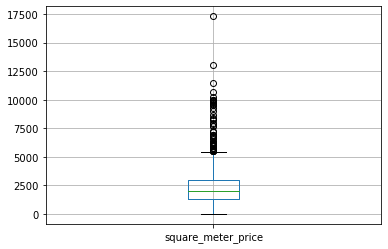

In [28]:
# use pd to create a simple boxplot
boxplot = sorted_df.boxplot(column=['square_meter_price'])

For the bar chart, I'll ignore some rows in the max and the min segment. I'll keep about 90% of the samples. This is only to have a better view of the distribution. Let's see what we can find if I create bins for categories of prices and count how many lands fit in each one. I'll create three bins for low, medium, and high values. 

In [29]:
# reset the index
sorted_df.reset_index(drop=True)

# drop about 5% of max and another 5% of min samples
sorted_df = sorted_df.iloc[45:-45,:]

# reset the index
sorted_df.reset_index(drop=True)

# Check the results
sorted_df.describe()

long         lat         area         price  square_meter_price
count  811.000000  811.000000   811.000000  8.110000e+02          811.000000
mean   -58.450694  -34.608298   423.044708  9.077546e+05         2250.810926
std      0.039079    0.027368   466.627766  1.086739e+06         1196.410987
min    -58.529674  -34.689147    25.000000  6.700000e+04          636.000000
25%    -58.481452  -34.628863   208.500000  3.665000e+05         1358.770654
50%    -58.453327  -34.610969   313.000000  6.100000e+05         2000.000000
75%    -58.421647  -34.591434   445.000000  9.900000e+05         2837.209141
max    -58.359279  -34.541884  7800.000000  9.000000e+06         6000.000000

In [30]:
import numpy as np

# create three bins
bins = np.linspace(min(sorted_df['square_meter_price']), max(sorted_df['square_meter_price']), 4)
bins

array([ 636., 2424., 4212., 6000.])

In [31]:
# define bins names
group_names = ['low','medium','high']

In [32]:
# add each category to a bin
df_categories = pd.cut(sorted_df['square_meter_price'], bins, labels=group_names, include_lowest=True )

Now I can see the counts for each category

In [33]:
# count and print the values
df_categories.value_counts()

low       530
medium    200
high       81
Name: square_meter_price, dtype: int64

Finally, let's plot the results to get a better insight into the distribution:

Text(0.5, 1.0, 'Count of Urban Land by Price of square Meter in Buenos Aires')

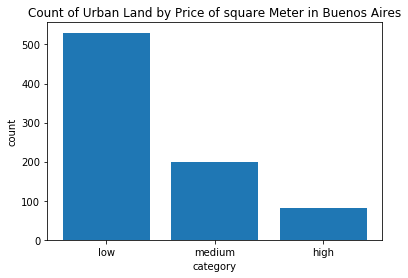

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df_categories.value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("category")
plt.pyplot.ylabel("count")
plt.pyplot.title("Count of Urban Land by Price of square Meter in Buenos Aires")

At this point, we can see that most of the land offer appear as low-price lands. Now, I want to mark all of them on the map. 

In [35]:
from folium import plugins

# create map of Bs AS using latitude and longitude values
map_bsas = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the urban land offers in the dataframe
lands = plugins.MarkerCluster().add_to(map_bsas)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng in zip(df.lat, df.long):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=None,
    ).add_to(lands)

# Add the neighborhoods to the map
folium.Choropleth(
    geo_data=barrios_geo,
    data=None,
    columns=None,
    key_on=None,
    fill_color='orange', 
    fill_opacity=0.3, 
    line_color='red',
    line_opacity=1,
    legend_name='Neighborhoods of Buenos Aires'
).add_to(map_bsas)
   
# display map
map_bsas

Let's create another map. This time using a choropleth style, and marking the neighborhoods categorized by its square meter price of the urban lands. 

In [36]:
# create map of Bs AS using latitude and longitude values
map_bsas = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add the neighborhoods to the map
folium.Choropleth(
    geo_data=barrios_geo,
    data=df,
    columns=['neighborhood','square_meter_price'],
    key_on='feature.properties.barrio',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean urban land price in Buenos Aires by neighborhood'
).add_to(map_bsas)

# display map
map_bsas

Now I have a notion about the value of urban land in the city of Buenos Aires and its distribution. I'll continue gathering information on other factors, including infrastructures like waterlogging zones and the existence of venues around the lands.  

# Waterlogging areas in Buenos Aires

First, I'll collect information about waterlogging zones. The dataset is provided by the government of the city of Buenos Aires.

In [37]:
# getting the data and putting into a dataframe
url_wl = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/sitios-posibles-de-anegamiento/sitios-pasibles-de-anegamiento-por-precipitacion-2019.csv'
df_wl = pd.read_csv(url_wl)

# the dataframe
df_wl.head()

WKT  Id Comuna  \
0  MULTIPOLYGON (((-58.4688327851566 -34.54810035...   0     13   
1  MULTIPOLYGON (((-58.4565134977589 -34.54736798...   0     13   
2  MULTIPOLYGON (((-58.4601114281587 -34.55124843...   0     13   
3  MULTIPOLYGON (((-58.4634121158693 -34.55591572...   0     13   
4  MULTIPOLYGON (((-58.471176371054 -34.569251789...   0     13   

           Clasif  
0  Sector Crítico  
1  Sector Crítico  
2  Sector Crítico  
3  Sector Crítico  
4  Sector Crítico

Now, it's time to explore the data and clean it if necessary.

In [38]:
# shape of the data
print('Dataset shape: ',df_wl.shape)

# let's see the classification values
print('Classification types: ',df_wl['Clasif'].unique())

# and the counts
print('Classification count: ',df_wl['Clasif'].value_counts())

Dataset shape:  (129, 4)
Classification types:  ['Sector Crítico' 'Sector a monitorear']
Classification count:  Sector Crítico         114
Sector a monitorear     15
Name: Clasif, dtype: int64


In [39]:
# find missing data
missing_data = df_wl.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

WKT
False    129
Name: WKT, dtype: int64

Id
False    129
Name: Id, dtype: int64

Comuna
False    129
Name: Comuna, dtype: int64

Clasif
False    129
Name: Clasif, dtype: int64



The data is Correct. I'll change the types of classification to better understanding.

In [40]:
df_wl['Clasif'] = df_wl['Clasif'].str.replace("Sector Crítico","Critic",case = True)
df_wl['Clasif'] = df_wl['Clasif'].str.replace("Sector a monitorear","Warning",case = True)

df_wl['Clasif'].unique()

array(['Critic', 'Warning'], dtype=object)

I'll drop the column Comuna since it's not necessary for the analysis

In [41]:
# drop the column 'Comuna'
df_wl.drop(['Id','Comuna'], axis=1, inplace=True)
df_wl.head()

WKT  Clasif
0  MULTIPOLYGON (((-58.4688327851566 -34.54810035...  Critic
1  MULTIPOLYGON (((-58.4565134977589 -34.54736798...  Critic
2  MULTIPOLYGON (((-58.4601114281587 -34.55124843...  Critic
3  MULTIPOLYGON (((-58.4634121158693 -34.55591572...  Critic
4  MULTIPOLYGON (((-58.471176371054 -34.569251789...  Critic

Now, I want to see where the waterlogging zones are, so I'll plot them in the map of Buenos Aires.

To do it, I'll create a GEOJSON file for each type of waterlogging zone using PyGeoj which is a simple Python GeoJSON file reader and writer. It exposees dictionary structures as high level objects with convenience methods, so the user does not have to get caught up in the details of the format specification.

In [42]:
# intall and import pygeoj
!pip install pygeoj
import pygeoj

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/7d/7c/8e/3c82fc15ee9f04d8df3e59817d2ee5499a8413341d6476c7d8
Successfully built pygeoj


In [43]:
# other imports needed
!pip install shapely
from shapely.wkt import loads
from shapely.geometry import mapping

!pip install geojson
import geojson
import ast

     |████████████████████████████████| 1.8MB 7.4MB/s eta 0:00:01


In [44]:
# create a GEOJSON file for warning and critic zones
newfileWarning = pygeoj.new()
newfileCritic = pygeoj.new()

# Add to each file the data coordinate system defaults to long/lat WGS84
newfileWarning.define_crs(type="link", link="http://spatialreference.org/ref/epsg/26912/esriwkt/", link_type="esriwkt")
newfileCritic.define_crs(type="link", link="http://spatialreference.org/ref/epsg/26912/esriwkt/", link_type="esriwkt")

# iterate through each row and select and add it to the dictionary 
for index, row in df_wl.iterrows():
    
    # Convert to a shapely.geometry.polygon.Polygon object
    geojson_string = geojson.dumps(mapping(loads(row['WKT'])))
    geojson_dict = ast.literal_eval(geojson_string)

    # add the dictionary to the corresponding file as a property
    if row['Clasif'] != 'Critic':
        newfileWarning.add_feature(properties={'classification':row['Clasif']},
                    geometry=geojson_dict)
    else:
        newfileCritic.add_feature(properties={'classification':row['Clasif']},
                    geometry=geojson_dict)
    

In [45]:
# complete the data for each file
newfileWarning.add_all_bboxes()
newfileWarning.update_bbox()
newfileWarning.add_unique_id()

newfileCritic.add_all_bboxes()
newfileCritic.update_bbox()
newfileCritic.add_unique_id()

With these two files, let's create a map with the waterlogging zones and the urban lands.With these two files, let's create a map with the waterlogging zones and the urban lands. I'll use red for the critic zones and yellow for the warning ones. To mark the lands, I use marker clusters. 

In [46]:
# create map of Bs AS using latitude and longitude values
map_bsas = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add the neighborhoods to the map
folium.Choropleth(
    geo_data=barrios_geo,
    data=None,
    columns=None,
    key_on=None,
    fill_color='white', 
    fill_opacity=0.5, 
    line_opacity=0.6,
).add_to(map_bsas)

# Warning zones 
folium.Choropleth(
    geo_data=newfileWarning,
    data=None,
    columns=None,
    key_on=None,
    fill_color='yellow', 
    fill_opacity=0.5, 
    line_opacity=0.8,
).add_to(map_bsas)

# Critic zones 
folium.Choropleth(
    geo_data=newfileCritic,
    data=None,
    columns=None,
    key_on=None,
    fill_color='red', 
    fill_opacity=0.5, 
    line_opacity=0.8,
).add_to(map_bsas)


    
map_bsas

# Foursquare

I decided to collect information on venues related to the food category, to have an idea of nearby competitors. On the other hand, I'll collect info related to categories that can be a customer source, as the travel category, like hotels, and to the nightlife category, like discotheques. 

In [47]:
# @hidden_cell
CLIENT_ID = 'LLNRK4OONOIEHS4ADCHOH4FONGCD3SC1OAVHELVLVASBY454' # your Foursquare ID
CLIENT_SECRET = 'SRH2L4SLTEXE5R4XVPOOJ3KMTUCJEQID4CEA2NDE0LLLSLF5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 20
radius = 250

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)
#

I'll store the selected three main category IDs according to Foursquare in a list. (https://developer.foursquare.com/docs/build-with-foursquare/categories/)

In [48]:
# list of categories of interest acording to foursquare (food, travel and nightlife)
categories = ['4d4b7105d754a06374d81259','4d4b7105d754a06379d81259','4d4b7105d754a06376d81259']


In [49]:
import requests # library to handle requests

I'll define some functions to collect the data and store it:

In [50]:
# function that extracts the id from category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['id']

In [51]:
def collect_sub_cat_ids(sub_list, category):
    # adding the id of the category before check if it has sub-categories
    sub_list = sub_list + [category['id']]
    
    # if the category has sub-categories
    if len(category['categories']) > 0:
        
        # for each sub-category, call recursive funtcion
        for sub_cat in category['categories']:
            sub_list = collect_sub_cat_ids(sub_list, sub_cat)
    
    return sub_list

# collect in a list all the sub-categories in the category with the main_id
def collect_ids(main_id, categories):
    # the list to return
    final_list = []
    # find the category with main_id
    for category in categories:
        if category['id'] == main_id:
            # recursive function to add sub-categories to the list
            final_list = final_list + collect_sub_cat_ids(final_list, category)
            
    return final_list

Now, everything is set to make a call to the Foursquare API to get all the categories. 

In [52]:
# get all the categories
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION 
    )
url

'https://api.foursquare.com/v2/venues/categories?&client_id=LLNRK4OONOIEHS4ADCHOH4FONGCD3SC1OAVHELVLVASBY454&client_secret=SRH2L4SLTEXE5R4XVPOOJ3KMTUCJEQID4CEA2NDE0LLLSLF5&v=20180605'

In [53]:
results = requests.get(url).json()


In [54]:
all_categories = results['response']['categories']

In [55]:
#create lists for three main categories: Food, Travel (includding hotels, airports, etc) and nightlife

In [56]:
food_list = collect_ids(categories[0],all_categories)
travel_list = collect_ids(categories[1],all_categories)
night_list = collect_ids(categories[2],all_categories)


Count how many categories have we stored in each variable

In [57]:
print('IDs in food category: ', len(food_list))
print('IDs in food travel: ', len(travel_list))
print('IDs in nightlife category: ', len(night_list))

IDs in food category:  349
IDs in food travel:  54
IDs in nightlife category:  25


With this, I can say that the all the data needed to the analysis is set. 

## Methodology <a name="methodology"></a>

The purpose of this project is to detect the best candidates among the urban land offer in the city of Buenos Aires, Argentina, considering a series of characteristics, like the value of the land, problems that the urban infrastructure, like waterlogging issues, may cause, and the density of venues around each land. The venues that are considered as important to the project are those categorized by Foursquare as Food, Travel & Transport, and Nightlife venues.

In the Data collection step, I have collected the required **data for the analysis. It includes information about neighborhoods in Buenos Aires, the offer of urban, and the location of waterlogging zones identified by the city administration. I've also collected the info related to subcategories of venues that correspond to the main categories mentioned before. 

For the analysis step, I'll work with this data to filter the urban land candidates, removing those who were located in zones identified as waterlogging zones. Next, I'll explore the nearby area of each one to get information about three different kinds of venues, attempting to recognize opportunities for the business, as the vicinity to hotels or travel venues, which is good, or to other food shops, which is not. I defined **vicinity**  as a radius of 250 meters from a land location. 

finally, I'll categorize the candidates 

## Analysis <a name="analysis"></a>

The first step of the analysis stage will be the filtering of candidates, removing those that are included in a waterlogging zone.  I'll utilize the coordinates of each land to determine it. To do this, I'll work with Shapely, a library for manipulation and analysis of geometric objects in the Cartesian plane.

In [58]:
# install and import shapely
!pip install shapely
import shapely.wkt # for creation of areas defined in WKT format
from shapely.geometry import Point # for creation of points defined x and coordinates

I'll store in the dataframe the times that each land is included in a waterlogging zone, creating two columns: wl_critic and wl_warning.

In [59]:
# count the columns on the dataframe
num_cols = len(df.columns)

#insert column for waterlogging classification at the end
df.insert(num_cols, 'wl_critic','') 
df.insert(num_cols+1, 'wl_warning','')

Let's see the results

In [60]:
df.head()

long        lat   area      price neighborhood  square_meter_price  \
0 -58.414071 -34.618214  320.0   330000.0      ALMAGRO         1031.250000   
1 -58.424566 -34.610097  320.0   690000.0      ALMAGRO         2156.250000   
2 -58.424486 -34.613659  174.0   380000.0      ALMAGRO         2183.908046   
3 -58.423651 -34.614752  650.0  1000000.0      ALMAGRO         1538.461538   
4 -58.413725 -34.603124  283.0   850000.0      ALMAGRO         3003.533569   

  wl_critic wl_warning  
0                       
1                       
2                       
3                       
4

Now, for each land, I'll check if it's included in one of the waterlogging zones stored. If it is, then I need to count how many times for all types. Finally, I'll store those counts in the dataframe. 

In [61]:
# check if urban lands match wtarlogging zones

#for each land
for index, row in df.iterrows():
    
    # create a point using land coordinates
    point = Point(row['long'],row['lat'])
    
    # set counters
    count_critic = 0
    count_warning = 0
    
    # for each waterlogging zone
    for ind, wl in df_wl.iterrows():
        
        # create a geometric form according to the WKT definition
        zone = shapely.wkt.loads(wl['WKT'])
        
        # determine if the point is included in the form
        result = point.within(zone)
        
        if result:
            
            # count if the zone is critic or warning
            if wl['Clasif'] == 'Critic':
                count_critic += 1
            else:
                count_warning += 1
               
    # store the result in the dataframe
    df.loc[index,'wl_critic'] = count_critic
    df.loc[index,'wl_warning'] = count_warning 

Let's see the results.

In [62]:
df.head()

long        lat   area      price neighborhood  square_meter_price  \
0 -58.414071 -34.618214  320.0   330000.0      ALMAGRO         1031.250000   
1 -58.424566 -34.610097  320.0   690000.0      ALMAGRO         2156.250000   
2 -58.424486 -34.613659  174.0   380000.0      ALMAGRO         2183.908046   
3 -58.423651 -34.614752  650.0  1000000.0      ALMAGRO         1538.461538   
4 -58.413725 -34.603124  283.0   850000.0      ALMAGRO         3003.533569   

  wl_critic wl_warning  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0

At this point, it's possible to identify the lands located in waterlogging zones. Let's remove them from the list of candidates. The **good** candidates,  those who are not located in any waterlogging area, will be stored in a new dataframe.

In [63]:
# keep only rows whith zero wl_critic and zero wl_warning
df_good = df[df['wl_critic']+df['wl_warning'] == 0]

In [64]:
df_good.shape

(794, 8)

I'll remove the columns, since they are not necessary anymore.

In [65]:
# drop unnecessary columns
df_good.drop(['wl_critic','wl_warning'], axis=1, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
df_good.shape

(794, 6)

Let's plot the map again with the waterlogging zones and the remaining candidates

In [67]:
# create map of Bs AS using latitude and longitude values
map_bsas = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add the neighborhoods to the map
folium.Choropleth(
    geo_data=barrios_geo,
    data=None,
    columns=None,
    key_on=None,
    fill_color='white', 
    fill_opacity=0.5, 
    line_opacity=0.6,
).add_to(map_bsas)

# Warning zones 
folium.Choropleth(
    geo_data=newfileWarning,
    data=None,
    columns=None,
    key_on=None,
    fill_color='yellow', 
    fill_opacity=0.5, 
    line_opacity=0.8,
).add_to(map_bsas)

# Critic zones 
folium.Choropleth(
    geo_data=newfileCritic,
    data=None,
    columns=None,
    key_on=None,
    fill_color='red', 
    fill_opacity=0.5, 
    line_opacity=0.8,
).add_to(map_bsas)

lands = plugins.MarkerCluster().add_to(map_bsas)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(df_good.lat, df_good.long):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=None,
    ).add_to(lands)
    
map_bsas

The remaining candidates have no problem with waterlogging. Let's add another filter. Let's remove those candidates with more than five competitors in its vicinity.

To do it, I need to count how many venues of the defined categories have each land. Let's use the Foursquare API to explore the vicinity of the lands and count the venues if they correspond to the lists of subcategories collected. I'll add a column for each type of venue count.

In [68]:
# total columns in the dataframe
num_cols = len(df_good.columns)

#insert column for each venue classification count
df_good.insert(num_cols, 'restaurant_counts','')
df_good.insert(num_cols+1, 'hotel_counts','')
df_good.insert(num_cols+2, 'other_counts','')

df_good.head()

long        lat   area      price neighborhood  square_meter_price  \
0 -58.414071 -34.618214  320.0   330000.0      ALMAGRO         1031.250000   
1 -58.424566 -34.610097  320.0   690000.0      ALMAGRO         2156.250000   
2 -58.424486 -34.613659  174.0   380000.0      ALMAGRO         2183.908046   
3 -58.423651 -34.614752  650.0  1000000.0      ALMAGRO         1538.461538   
4 -58.413725 -34.603124  283.0   850000.0      ALMAGRO         3003.533569   

  restaurant_counts hotel_counts other_counts  
0                                              
1                                              
2                                              
3                                              
4

Everything ready. Let's go through the list of lands counting the venues in its vicinity.

In [ ]:
# for ecah land
for index, row in df_good[df_good['restaurant_counts']== ''].iterrows():
    
    #create the url for the API call
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    row['lat'], 
    row['long'],
    radius, 
    LIMIT)

    # consoulting venues
    results = requests.get(url).json()
    
    # results  
    total_results = results['response']['totalResults']
    
    # if there are results
    if total_results > 0:
        
        # get the venues and store it in a dataframe
        venues = results['response']['groups'][0]['items']
        city_venues = pd.json_normalize(venues) # flatten JSON
    
        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        city_venues = city_venues.loc[:, filtered_columns]
    
        # filter the category for each row
        city_venues['venue.categories'] = city_venues.apply(get_category_type, axis=1)

        # clean columns
        city_venues.columns = [col.split(".")[-1] for col in city_venues.columns]
        
        # set counters for each category
        food_count = 0
        travel_count = 0
        night_count = 0
        
        # count the venues
        for id_cat in city_venues['categories']:
            
            if id_cat in food_list:
                food_count += 1
            elif id_cat in travel_list:
                travel_count += 1
            elif id_cat in night_list:
                night_count += 1
                
            
    # store the results
    df_good.loc[index,'restaurant_counts'] = food_count
    df_good.loc[index,'hotel_counts'] = travel_count
    df_good.loc[index,'other_counts'] = night_count
        
      

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


I've the count of venues for each land. Let's remove those with more than four competitors in its vicinity.

In [ ]:
df_good = df_good[df_good['restaurant_counts']<=4]

In [ ]:
df_good.head()

In [ ]:
df_good.reset_index(drop = True)

In [ ]:
df_good.shape

We also have the list of venues. 

In [ ]:
city_venues.head()

Let's plot the map one more time.

In [ ]:
# create map of Bs AS using latitude and longitude values
map_bsas = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add the neighborhoods to the map
folium.Choropleth(
    geo_data=barrios_geo,
    data=None,
    columns=None,
    key_on=None,
    fill_color='white', 
    fill_opacity=0.5, 
    line_opacity=0.6,
).add_to(map_bsas)

# Warning zones 
folium.Choropleth(
    geo_data=newfileWarning,
    data=None,
    columns=None,
    key_on=None,
    fill_color='yellow', 
    fill_opacity=0.5, 
    line_opacity=0.8,
).add_to(map_bsas)

# Critic zones 
folium.Choropleth(
    geo_data=newfileCritic,
    data=None,
    columns=None,
    key_on=None,
    fill_color='red', 
    fill_opacity=0.5, 
    line_opacity=0.8,
).add_to(map_bsas)

lands = plugins.MarkerCluster().add_to(map_bsas)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(df_good.lat, df_good.long):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=None,
    ).add_to(lands)
    
map_bsas

The final step will be the clustering of the candidates. I'll use K-means to do it, and I want five clusters. Let's go.

In [ ]:
# import the module
from sklearn.cluster import KMeans 

Let's standardize the data for the columns of square meter price and the counters.

In [ ]:
# import
from sklearn.preprocessing import StandardScaler

# clustering using a subset of columns
X = df_good.values[:,5:9]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler(with_mean=True, with_std=True).fit_transform(X)

# standardized data
Clus_dataSet

In [ ]:
# number of desired clusters
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

In [ ]:
# add the classification to the dataset
df_good["Clus_Db"]=labels

I'll plot the map with all the info: clustered candidates (using different colors) and waterlogging zones.

In [ ]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add the neighborhoods to the map
folium.Choropleth(
    geo_data=barrios_geo,
    data=None,
    columns=None,
    key_on=None,
    fill_color='white', 
    fill_opacity=0.5, 
    line_opacity=0.6,
    legend_name='Neighborhoods of Buenos Aires'
).add_to(map_clusters)

# Warning zones 
folium.Choropleth(
    geo_data=newfileWarning,
    data=None,
    columns=None,
    key_on=None,
    fill_color='yellow', 
    fill_opacity=0.5, 
    line_opacity=0.8,
    legend_name='Neighborhoods of Buenos Aires'
).add_to(map_clusters)

# Critic zones 
folium.Choropleth(
    geo_data=newfileCritic,
    data=None,
    columns=None,
    key_on=None,
    fill_color='red', 
    fill_opacity=0.5, 
    line_opacity=0.8,
    legend_name='Neighborhoods of Buenos Aires'
).add_to(map_clusters)


# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster, price, count_r, count_h, count_o  in zip(df_good['lat'], df_good['long'], df_good['Clus_Db'], df_good['square_meter_price'], df_good['restaurant_counts'], df_good['hotel_counts'], df_good['other_counts']):
    label = folium.Popup('Cluster ' + str(cluster) +'\n' + 'Value (m2/USD): ' + str(price) +'\n'+ 'restaurants: ' + str(count_r) + '\n' + ' hotels: ' + str(count_h) +'\n' + ' Nightlife: ' + str(count_o), parse_html=True)
    #label = None
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=(rainbow[cluster-1] if cluster!=-1 else 'black'),
        fill=True,
        fill_color=(rainbow[cluster-1] if cluster!=-1 else 'black'),
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

To finish the analysis, let's explore the clusters.

In [ ]:
# convert the columns to float for better description
df_good=df_good.astype({'restaurant_counts':float, 'hotel_counts':float, 'other_counts':float})


### Cluster 0

According to the mean, these candidates have a high value, a considerable count of restaurants, and lower counts for the other categories.

In [ ]:
df_good[df_good['Clus_Db'] == 0].describe()

### Cluster 1

These candidates have a lower value and lower counts for all the categories.

In [ ]:
df_good[df_good['Clus_Db'] == 1].describe()

### Cluster 2

According to the mean, these candidates have lower value but a considerable count of restaurants and hotels. The count of nightlife venues is lower, too.

In [ ]:
df_good[df_good['Clus_Db'] == 2].describe()

### Cluster 3

According to the mean, these candidates have lower value but a considerable count of restaurants. Also have zero *travel* venues and a lower count of nightlife venues.

In [ ]:
df_good[df_good['Clus_Db'] == 3].describe()

### Cluster 4

According to the mean, these candidates have high value and a considerable count of restaurants and nightlife venues. The count of travel venues is low.

In [ ]:
df_good[df_good['Clus_Db'] == 4].describe()

## Results and Discussion <a name="results"></a>

The analysis stage started with the examination of the offer of urban land in the city. I've found that the value of the land isn't evenly distributed and most of the offer can be categorized in a low-price class.  This was represented in a graphical way using a box plot and a bar chart. Concerning the location, I've concluded that generally speaking,  lands are well distributed over the city, except for a couple of neighborhoods and the west limit. 

The next step was to identify lands located in high-risk zones, because of the existence of waterlogging problems in the city.  Using geometry concepts applied to geospatial variables, it was possible to determine if a candidate is located in a waterlogging zone. Naturally, these candidates were excluded from the list of "good" ones to reduce those risks. 

After that, I realized the exploration of the vicinity of each candidate, defined as a surrounding area in a radius of 250 meters, searching for venues related to food, travel, and nightlife. This search allows me to count how many venues of each type surround the candidates. That information is used for filtering those with a considerable amount of possible competitors. This info is also considered to detect good conditions for the business. For example, the closeness to a hotel could provide a substantial volume of customers.

To conclude, the remaining candidates were clustered if five categories according to the value of the land and the counts of different types of nearby venues. This categorization gives investors insights about business opportunities in the zone to take advantage of the proximity of hotels, dance clubs, pubs, or another possible source of customers, avoiding concentrations of competitors. 

It's important to mention that this study only included three variables to construct lists to help stakeholders in their election of a candidate. However, many variables can be studied to identify the best option.


## Conclusion <a name="conclusion"></a>

The objective of this analysis wasn't to define which candidates are the best but generate lists of similar ones that can fit basic requirements previously defined by stakeholders. These lists have fewer options than the original, its content has specific characteristics, which is useful to stakeholders, and doesn't include lands considered disadvantageous
because of location inside waterlogging zones. 

Considering that there is a universe of variables that can influence the election of urban land for restaurants, like the attractiveness of each location, security, social and economic dynamics, the volume of tourists, etc, there is plenty of room for improvement.